In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, InceptionV3, MobileNet
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/final.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [ ]:
!unzip "/content/drive/MyDrive/final.zip"

Streaming output truncated to the last 5000 lines.
  inflating: final/train/fire/Fire (552).jpg  
  inflating: final/train/fire/Fire (552).png  
  inflating: final/train/fire/Fire (553).jpg  
  inflating: final/train/fire/Fire (553).png  
  inflating: final/train/fire/Fire (554).jpg  
  inflating: final/train/fire/Fire (554).png  
  inflating: final/train/fire/Fire (555).jpg  
  inflating: final/train/fire/Fire (555).png  
  inflating: final/train/fire/Fire (556).jpg  
  inflating: final/train/fire/Fire (556).png  
  inflating: final/train/fire/Fire (557).jpg  
  inflating: final/train/fire/Fire (557).png  
  inflating: final/train/fire/Fire (558).jpg  
  inflating: final/train/fire/Fire (558).png  
  inflating: final/train/fire/Fire (559).jpg  
  inflating: final/train/fire/Fire (559).png  
  inflating: final/train/fire/Fire (56).jpeg  
  inflating: final/train/fire/Fire (56).jpg  
  inflating: final/train/fire/Fire (56).png  
  inflating: final/train/fire/Fire (560).jpg  
  inflating

In [ ]:
# Define paths to your training and testing data
train_data_dir = '/content/dataset/final/train'
test_data_dir = '/content/dataset/final/test'

# Image size
img_width, img_height = 224, 224

# Batch size
batch_size = 32

In [ ]:
# Preprocessing function for the respective models
def preprocess_input_vgg(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

def preprocess_input_inception(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# No augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 6154 images belonging to 3 classes.
Found 1995 images belonging to 3 classes.


In [ ]:
# Define the models
models = {
    "VGG16": VGG16(weights='imagenet', include_top=False),
    "VGG19": VGG19(weights='imagenet', include_top=False),
    "ResNet50": ResNet50(weights='imagenet', include_top=False),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False),
    "MobileNet": MobileNet(weights='imagenet', include_top=False)
}

87910968/87910968 [==============================] - 0s 0us/step


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
# Train and evaluate each model
for name, model in models.items():
    # Add custom layers on top of pretrained model
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
    model = Model(inputs=model.input, outputs=predictions)

    # Freeze the layers except the last few layers
    for layer in model.layers[:-6]:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=5,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Evaluate the model
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{name} Accuracy: {accuracy}")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {name}:")
    print(cm)

Epoch 1/5
 11/192 [>.............................] - ETA: 1:02:58 - loss: 1.1927 - accuracy: 0.4205

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, accuracy_score, classification_report


In [ ]:
for name, model in models.items():
    # Add custom layers on top of pretrained model
    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
    model = Model(inputs=model.input, outputs=predictions)

    # Freeze the layers except the last few layers
    for layer in model.layers[:-6]:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=5,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size
    )

    # Evaluate the model
    predictions = model.predict(test_generator)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{name} Accuracy: {accuracy}")

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n{name} Precision: {precision}")
    print(f"\n{name} Recall: {recall}")
    print(f"\n{name} F1 Score: {f1}")
    print(f"\n{name} Accuracy score: {accuracy_score}")

    # Optionally, you can also print the detailed classification report
    class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
    print(f"\nClassification Report for {name}:")
    print(class_report)


Epoch 1/5
  1/192 [..............................] - ETA: 1:10:39 - loss: 1.0899 - accuracy: 0.4375

KeyboardInterrupt: 

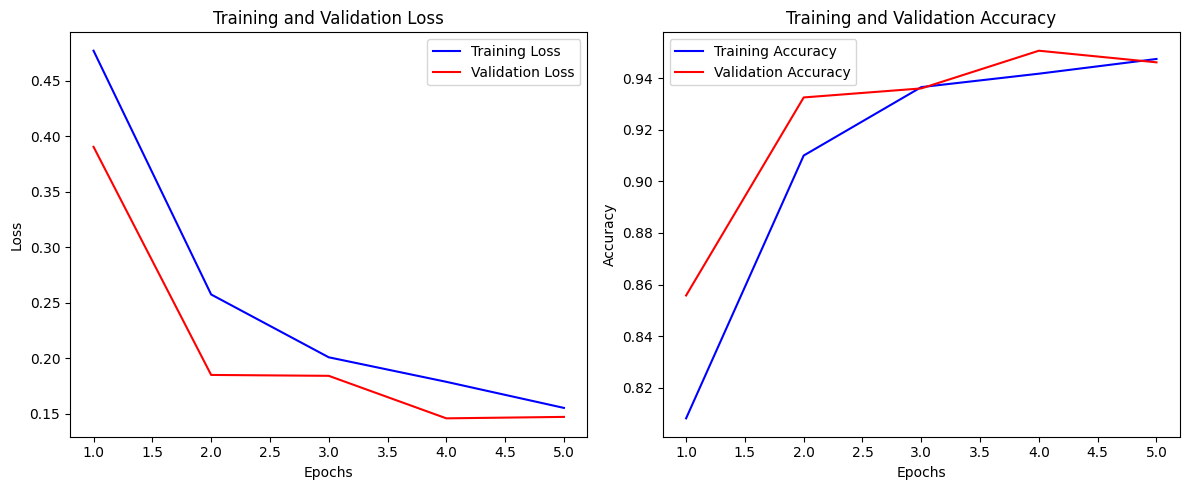

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the provided logs
epochs = [1, 2, 3, 4, 5]
train_loss = [0.4772, 0.2576, 0.2010, 0.1789, 0.1554]
train_accuracy = [0.8082, 0.9100, 0.9365, 0.9417, 0.9474]
val_loss = [0.3906, 0.1851, 0.1843, 0.1460, 0.1473]
val_accuracy = [0.8558, 0.9325, 0.9360, 0.9506, 0.9461]

# Plotting the graphs
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


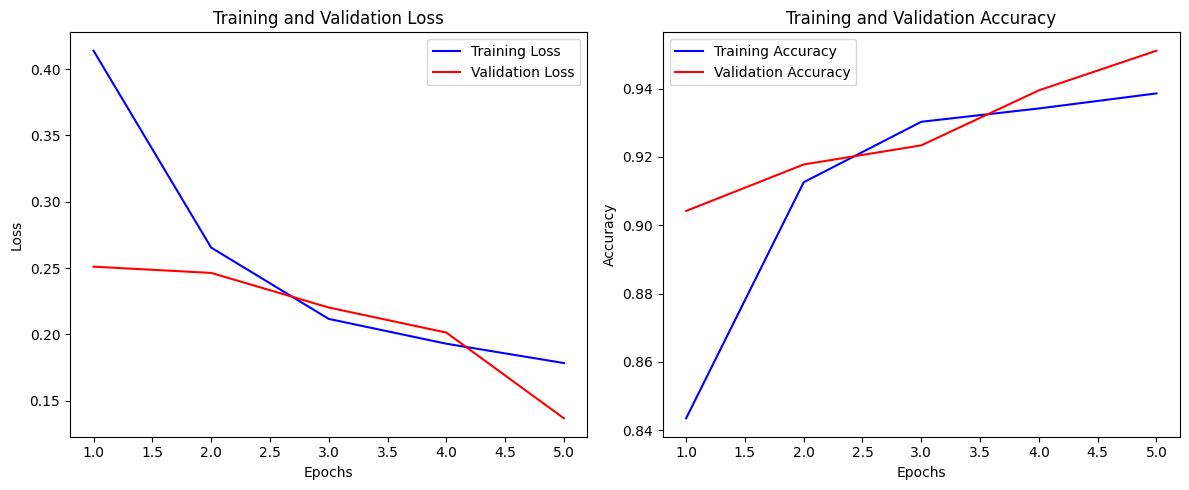

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the provided logs
epochs = [1, 2, 3, 4, 5]
train_loss = [0.4139, 0.2654, 0.2116, 0.1929, 0.1783]
train_accuracy = [0.8435, 0.9126, 0.9303, 0.9342, 0.9386]
val_loss = [0.2510, 0.2463, 0.2202, 0.2013, 0.1366]
val_accuracy = [0.9042, 0.9178, 0.9234, 0.9395, 0.9511]

# Plotting the graphs
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


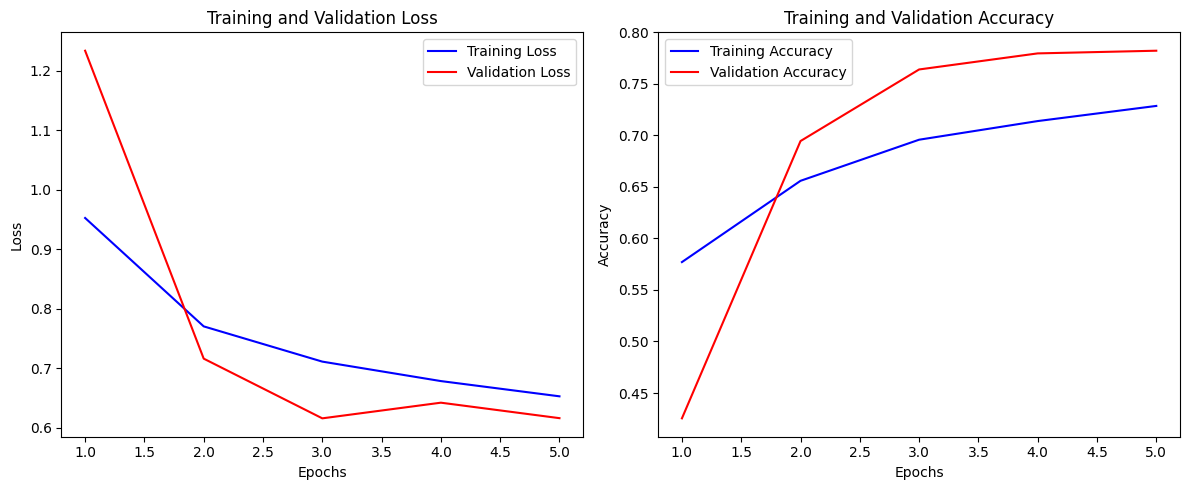

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the provided logs
epochs = [1, 2, 3, 4, 5]
train_loss = [0.9523, 0.7702, 0.7110, 0.6783, 0.6527]
train_accuracy = [0.5771, 0.6560, 0.6959, 0.7140, 0.7287]
val_loss = [1.2333, 0.7160, 0.6157, 0.6420, 0.6160]
val_accuracy = [0.4254, 0.6946, 0.7641, 0.7797, 0.7823]

# Plotting the graphs
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


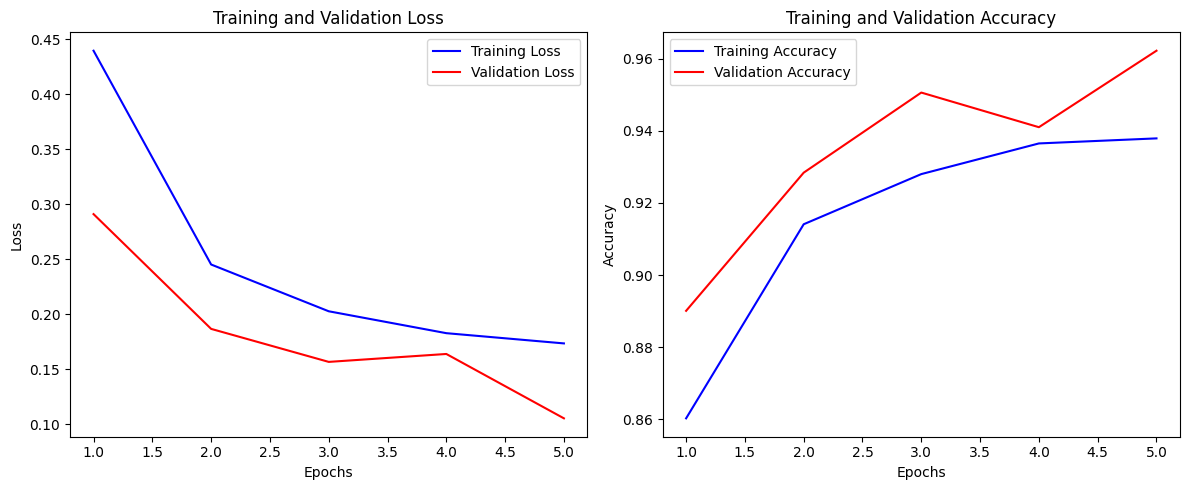

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the provided logs
epochs = [1, 2, 3, 4, 5]
train_loss = [0.4395, 0.2452, 0.2027, 0.1828, 0.1735]
train_accuracy = [0.8603, 0.9141, 0.9280, 0.9365, 0.9379]
val_loss = [0.2910, 0.1867, 0.1567, 0.1639, 0.1054]
val_accuracy = [0.8901, 0.9284, 0.9506, 0.9410, 0.9622]

# Plotting the graphs
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


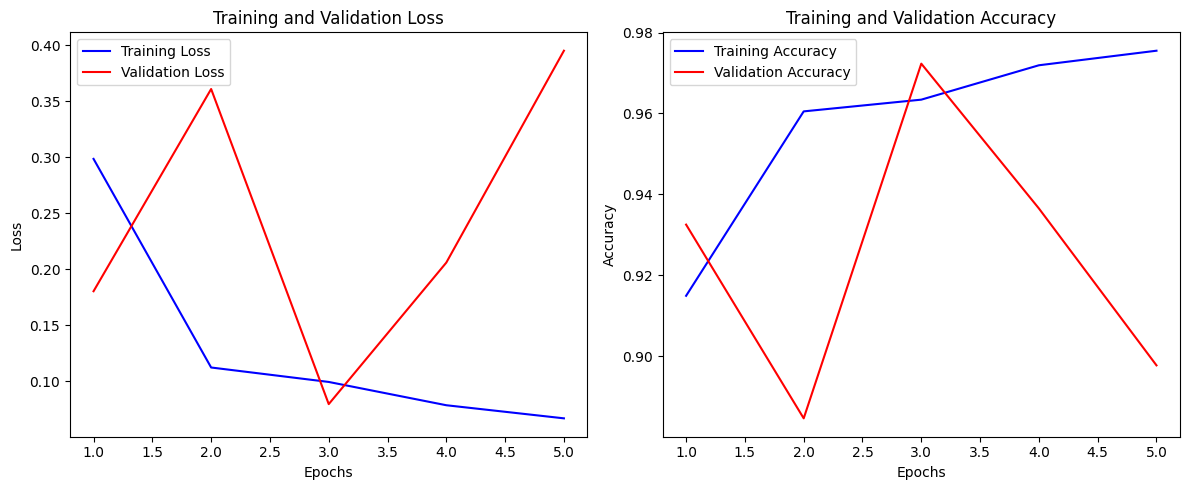

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the provided logs
epochs = [1, 2, 3, 4, 5]
train_loss = [0.2984, 0.1121, 0.0992, 0.0784, 0.0667]
train_accuracy = [0.9149, 0.9605, 0.9634, 0.9719, 0.9755]
val_loss = [0.1802, 0.3608, 0.0794, 0.2058, 0.3950]
val_accuracy = [0.9325, 0.8846, 0.9723, 0.9365, 0.8977]

# Plotting the graphs
plt.figure(figsize=(12, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


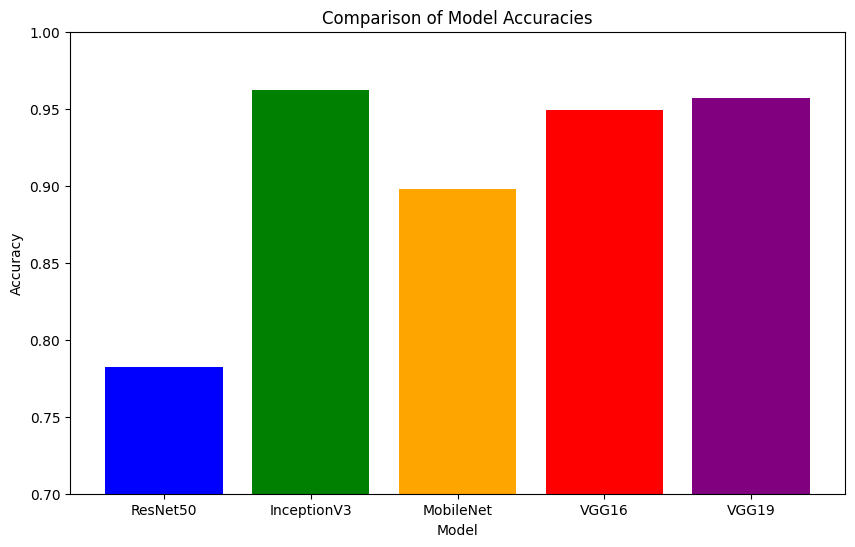

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['ResNet50', 'InceptionV3', 'MobileNet', 'VGG16', 'VGG19']
accuracies = [0.7824561403508772, 0.9619047619047619, 0.8977443609022556, 0.9492063492063492, 0.9568783068783068]

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)  # Setting y-axis limits for better visualization
plt.show()


In [ ]:
models = {
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False)
}


NameError: name 'InceptionV3' is not defined

In [ ]:
import os

# Replace 'your_folder_path' with the actual path to your image folder
folder_path = '/content/dataset/final/train/smoke'

# Get a list of filenames in the folder
filenames = os.listdir(folder_path)

# Count the number of images, filtering for common image extensions
image_count = 0
for filename in filenames:
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
        image_count += 1

print(f"There are {image_count} images in the folder.")


There are 1426 images in the folder.
